In [1]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

df = pd.read_csv("feature_updated.csv", low_memory=False)


### STANDARD SETUP

features = df.columns
to_exclude = ['code', 'status', 'year', 'month', 'dataset', 'split', 'author', 'category', 'MV']
features = [x for x in features if x not in to_exclude]
# from 0 to 2152: metadata features; from 2152 to 6152 (end): code features
# if you want to use the "combined classifier", choose all features

label = 'status'
threshold = 0.912 # this was derived by Ben





In [2]:
number = 15 # number of extensions to use at each new active learning iteration

In [3]:
def choose_and_merge_top(train_set, test_set, number=number):
    # This function takes a given "train_set", and adds "number" new samples taken from the given "test set"
    # The samples are chosen from the top of the "test set" (assuming that it is ordered)

    top = test_set[:number]
    top = top.drop(columns=['AbsProbDiff'])
    actl_train_set = pd.concat([train_set, top], ignore_index=True)
    return actl_train_set

In [4]:
def choose_and_merge_rnd(train_set, test_set, number=number):
    # This function takes a given "train_set", and adds "number" new samples taken from the given "test set"
    # The samples are randomly chosen from the test set

    rnd = test_set.sample(n=number, random_state=number)
    rnd = rnd.drop(columns=['AbsProbDiff'])
    abla_train_set = pd.concat([train_set, rnd], ignore_index=True)
    return abla_train_set

In [5]:
def test_clf(clf, test_set, features=features, label=label, threshold=threshold):
    pred = clf.predict(test_set[features])
    probabilities = clf.predict_proba(test_set[features])


    y_pred = []
    for prob in probabilities:
        if prob[0] >= threshold:
            y_pred.append("benign")
        else:
            y_pred.append("malware")


    acc = sk.metrics.accuracy_score(test_set[label], y_pred)
    prec = sk.metrics.precision_score(test_set[label], y_pred, pos_label='malware')
    rec = sk.metrics.recall_score(test_set[label], y_pred, pos_label='malware')
    print("Accuracy: {:.2f}%,\tPrecision: {:.2f}%\tRecall: {:.2f}%".format(acc*100, prec*100, rec*100))

    display(pd.crosstab(test_set[label], y_pred, rownames=['True'], colnames=['Pred']))


    return probabilities, acc, prec, rec

In [6]:
def refactor_proba(probabilities, test_set, threshold=threshold):
    probabilities = probabilities[:,0]
    probabilities = probabilities - threshold
    probabilities = abs(probabilities)
    probabilities = pd.DataFrame(probabilities, columns=['AbsProbDiff'])
    probabilities = probabilities.reset_index(drop=True)

    test_set = test_set.reset_index(drop=True)
    new_test_set = pd.concat([test_set, probabilities], axis=1)
    new_test_set = new_test_set.sort_values(by='AbsProbDiff', ascending=True)
    return new_test_set

In [7]:
pre_2022 = df[df['year']<=2021]
df_2022 = df[df['year']==2022]
df_2023 = df[df['year']==2023]

In [8]:
df_2022_1 = df_2022[df_2022['month']==1]
df_2022_2 = df_2022[df_2022['month']==2]
df_2022_3 = df_2022[df_2022['month']==3]
df_2022_4 = df_2022[df_2022['month']==4]
df_2022_5 = df_2022[df_2022['month']==5]
df_2022_6 = df_2022[df_2022['month']==6]
df_2022_7 = df_2022[df_2022['month']==7]
df_2022_8 = df_2022[df_2022['month']==8]
df_2022_9 = df_2022[df_2022['month']==9]
df_2022_10 = df_2022[df_2022['month']==10]
df_2022_11 = df_2022[df_2022['month']==11]
df_2022_12 = df_2022[df_2022['month']==12]

df_2023_1 = df_2023[df_2023['month']==1]
df_2023_2 = df_2023[df_2023['month']==2]
df_2023_3 = df_2023[df_2023['month']==3]
df_2023_4 = df_2023[df_2023['month']==4]
df_2023_5 = df_2023[df_2023['month']==5]
df_2023_6 = df_2023[df_2023['month']==6]
df_2023_7 = df_2023[df_2023['month']==7]
df_2023_8 = df_2023[df_2023['month']==8]
df_2023_9 = df_2023[df_2023['month']==9]
df_2023_10 = df_2023[df_2023['month']==10]
df_2023_11 = df_2023[df_2023['month']==11]
df_2023_12 = df_2023[df_2023['month']==12]

In [9]:
b_acc = []
b_rec = []
b_prec = []

a_acc = []
a_rec = []
a_prec = []

r_acc = []
r_rec = []
r_prec = []

In [10]:
## Define and train the classifier
rf_2021 = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2021.fit(pre_2022[features], pre_2022[label])
print(f"Training time: f{datetime.now()- start}")


## Test the classifier

prob_2022, acc, prec, rec = test_clf(rf_2021, df_2022)


Training time: f0:00:18.807894
Accuracy: 95.13%,	Precision: 29.14%	Recall: 52.49%


Pred,benign,malware
True,,
benign,13543,513
malware,191,211


In [11]:
## Test the classifier on January 2022

prob_2022_1, acc, prec, rec = test_clf(rf_2021, df_2022_1)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)


Accuracy: 95.38%,	Precision: 50.00%	Recall: 66.67%


Pred,benign,malware
True,,
benign,900,30
malware,15,30


In [12]:
## Test the classifier on Feb 2022

prob_2022_2, acc, prec, rec= test_clf(rf_2021, df_2022_2)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 96.29%,	Precision: 33.33%	Recall: 33.33%


Pred,benign,malware
True,,
benign,926,18
malware,18,9


In [13]:
prob_2022_3, acc, prec, rec = test_clf(rf_2021, df_2022_3)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 96.11%,	Precision: 29.79%	Recall: 60.87%


Pred,benign,malware
True,,
benign,1023,33
malware,9,14


In [14]:
prob_2022_4, acc, prec, rec = test_clf(rf_2021, df_2022_4)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 95.53%,	Precision: 49.09%	Recall: 54.00%


Pred,benign,malware
True,,
benign,1063,28
malware,23,27


In [15]:
prob_2022_5, acc, prec, rec = test_clf(rf_2021, df_2022_5)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 94.75%,	Precision: 6.25%	Recall: 13.64%


Pred,benign,malware
True,,
benign,1153,45
malware,19,3


In [16]:
prob_2022_6, acc, prec, rec = test_clf(rf_2021, df_2022_6)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 94.21%,	Precision: 8.11%	Recall: 50.00%


Pred,benign,malware
True,,
benign,1197,68
malware,6,6


In [17]:
prob_2022_7, acc, prec, rec = test_clf(rf_2021, df_2022_7)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 95.76%,	Precision: 39.22%	Recall: 51.28%


Pred,benign,malware
True,,
benign,1110,31
malware,19,20


In [18]:
prob_2022_8, acc, prec, rec = test_clf(rf_2021, df_2022_8)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 96.37%,	Precision: 48.33%	Recall: 67.44%


Pred,benign,malware
True,,
benign,1166,31
malware,14,29


In [19]:
prob_2022_9, acc, prec, rec = test_clf(rf_2021, df_2022_9)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 95.61%,	Precision: 39.73%	Recall: 70.73%


Pred,benign,malware
True,,
benign,1191,44
malware,12,29


In [20]:
prob_2022_10, acc, prec, rec = test_clf(rf_2021, df_2022_10)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 94.54%,	Precision: 24.32%	Recall: 60.00%


Pred,benign,malware
True,,
benign,1159,56
malware,12,18


In [21]:
prob_2022_11, acc, prec, rec = test_clf(rf_2021, df_2022_11)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 94.85%,	Precision: 18.75%	Recall: 35.29%


Pred,benign,malware
True,,
benign,1351,52
malware,22,12


In [22]:
prob_2022_12, acc, prec, rec = test_clf(rf_2021, df_2022_12)

b_acc.append(acc)
b_rec.append(rec)
b_prec.append(prec)

Accuracy: 93.01%,	Precision: 15.38%	Recall: 38.89%


Pred,benign,malware
True,,
benign,1304,77
malware,22,14


In [23]:
#### Let's try with active learning

In [24]:
df_2022_1 = refactor_proba(prob_2022_1, df_2022_1)
top_2022_1 = choose_and_merge_top(pre_2022, df_2022_1)
rnd_2022_1 = choose_and_merge_rnd(pre_2022, df_2022_1)



## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_1_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_1_top.fit(top_2022_1[features], top_2022_1[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_1_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_1_rnd.fit(rnd_2022_1[features], rnd_2022_1[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_2_rnd, acc, prec, rec = test_clf(rf_2022_1_rnd, df_2022_2)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)

prob_2022_2_top, acc, prec, rec = test_clf(rf_2022_1_top, df_2022_2)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:22.639905
Training time: f0:00:20.210271
Accuracy: 96.60%,	Precision: 39.29%	Recall: 40.74%


Pred,benign,malware
True,,
benign,927,17
malware,16,11


Accuracy: 97.84%,	Precision: 57.14%	Recall: 88.89%


Pred,benign,malware
True,,
benign,926,18
malware,3,24


In [25]:
df_2022_2 = refactor_proba(prob_2022_2_top, df_2022_2)
top_2022_2 = choose_and_merge_top(top_2022_1, df_2022_2)
rnd_2022_2 = choose_and_merge_rnd(rnd_2022_1, df_2022_2)


## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_2_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_2_top.fit(top_2022_2[features], top_2022_2[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_2_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_2_rnd.fit(rnd_2022_2[features], rnd_2022_2[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_3_rnd, acc, prec, rec = test_clf(rf_2022_2_rnd, df_2022_3)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)


prob_2022_3_top, acc, prec, rec = test_clf(rf_2022_2_top, df_2022_3)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:22.405559
Training time: f0:00:20.159122
Accuracy: 95.55%,	Precision: 24.49%	Recall: 52.17%


Pred,benign,malware
True,,
benign,1019,37
malware,11,12


Accuracy: 97.13%,	Precision: 41.67%	Recall: 86.96%


Pred,benign,malware
True,,
benign,1028,28
malware,3,20


In [26]:
df_2022_3 = refactor_proba(prob_2022_3_top, df_2022_3)
top_2022_3 = choose_and_merge_top(top_2022_2, df_2022_3)
rnd_2022_3 = choose_and_merge_rnd(rnd_2022_2, df_2022_3)


## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_3_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_3_top.fit(top_2022_3[features], top_2022_3[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_3_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_3_rnd.fit(rnd_2022_3[features], rnd_2022_3[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_4_rnd, acc, prec, rec = test_clf(rf_2022_3_rnd, df_2022_4)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)

prob_2022_4_top, acc, prec, rec = test_clf(rf_2022_3_top, df_2022_4)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:19.490316
Training time: f0:00:18.320963
Accuracy: 95.27%,	Precision: 46.43%	Recall: 52.00%


Pred,benign,malware
True,,
benign,1061,30
malware,24,26


Accuracy: 96.84%,	Precision: 62.50%	Recall: 70.00%


Pred,benign,malware
True,,
benign,1070,21
malware,15,35


In [27]:
df_2022_4 = refactor_proba(prob_2022_4_top, df_2022_4)
top_2022_4 = choose_and_merge_top(top_2022_3, df_2022_4)
rnd_2022_4 = choose_and_merge_rnd(rnd_2022_3, df_2022_4)


## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_4_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_4_top.fit(top_2022_4[features], top_2022_4[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_4_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_4_rnd.fit(rnd_2022_4[features], rnd_2022_4[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_5_rnd, acc, prec, rec = test_clf(rf_2022_4_rnd, df_2022_5)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)

prob_2022_5_top, acc, prec, rec = test_clf(rf_2022_4_top, df_2022_5)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:21.260962
Training time: f0:00:18.674070
Accuracy: 94.84%,	Precision: 6.38%	Recall: 13.64%


Pred,benign,malware
True,,
benign,1154,44
malware,19,3


Accuracy: 95.74%,	Precision: 25.81%	Recall: 72.73%


Pred,benign,malware
True,,
benign,1152,46
malware,6,16


In [28]:
df_2022_5 = refactor_proba(prob_2022_5_top, df_2022_5)
top_2022_5 = choose_and_merge_top(top_2022_4, df_2022_5)
rnd_2022_5 = choose_and_merge_rnd(rnd_2022_4, df_2022_5)


## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_5_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_5_top.fit(top_2022_5[features], top_2022_5[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_5_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_5_rnd.fit(rnd_2022_5[features], rnd_2022_5[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_6_rnd, acc, prec, rec = test_clf(rf_2022_5_rnd, df_2022_6)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)

prob_2022_6_top, acc, prec, rec = test_clf(rf_2022_5_top, df_2022_6)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:20.419264
Training time: f0:00:18.170977
Accuracy: 93.66%,	Precision: 2.74%	Recall: 16.67%


Pred,benign,malware
True,,
benign,1194,71
malware,10,2


Accuracy: 95.14%,	Precision: 12.12%	Recall: 66.67%


Pred,benign,malware
True,,
benign,1207,58
malware,4,8


In [29]:
df_2022_6 = refactor_proba(prob_2022_6_top, df_2022_6)
top_2022_6 = choose_and_merge_top(top_2022_5, df_2022_6)
rnd_2022_6 = choose_and_merge_rnd(rnd_2022_5, df_2022_6)


## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_6_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_6_top.fit(top_2022_6[features], top_2022_6[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_6_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_6_rnd.fit(rnd_2022_6[features], rnd_2022_6[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_7_rnd, acc, prec, rec = test_clf(rf_2022_6_rnd, df_2022_7)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)

prob_2022_7_top, acc, prec, rec = test_clf(rf_2022_6_top, df_2022_7)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:20.093121
Training time: f0:00:18.276302
Accuracy: 95.08%,	Precision: 29.79%	Recall: 35.90%


Pred,benign,malware
True,,
benign,1108,33
malware,25,14


Accuracy: 96.19%,	Precision: 43.75%	Recall: 53.85%


Pred,benign,malware
True,,
benign,1114,27
malware,18,21


In [30]:
df_2022_7 = refactor_proba(prob_2022_7_top, df_2022_7)
top_2022_7 = choose_and_merge_top(top_2022_6, df_2022_7)
rnd_2022_7 = choose_and_merge_rnd(rnd_2022_6, df_2022_7)


## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_7_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_7_top.fit(top_2022_7[features], top_2022_7[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_7_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_7_rnd.fit(rnd_2022_7[features], rnd_2022_7[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_8_rnd, acc, prec, rec = test_clf(rf_2022_7_rnd, df_2022_8)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)

prob_2022_8_top, acc, prec, rec = test_clf(rf_2022_7_top, df_2022_8)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:20.605498
Training time: f0:00:18.373186
Accuracy: 95.24%,	Precision: 36.67%	Recall: 51.16%


Pred,benign,malware
True,,
benign,1159,38
malware,21,22


Accuracy: 96.61%,	Precision: 50.82%	Recall: 72.09%


Pred,benign,malware
True,,
benign,1167,30
malware,12,31


In [31]:
df_2022_8 = refactor_proba(prob_2022_8_top, df_2022_8)
top_2022_8 = choose_and_merge_top(top_2022_7, df_2022_8)
rnd_2022_8 = choose_and_merge_rnd(rnd_2022_7, df_2022_8)


## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_8_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_8_top.fit(top_2022_8[features], top_2022_8[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_8_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_8_rnd.fit(rnd_2022_8[features], rnd_2022_8[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_9_rnd, acc, prec, rec = test_clf(rf_2022_8_rnd, df_2022_9)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)

prob_2022_9_top, acc, prec, rec = test_clf(rf_2022_8_top, df_2022_9)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:19.620031
Training time: f0:00:18.719436
Accuracy: 95.38%,	Precision: 37.50%	Recall: 65.85%


Pred,benign,malware
True,,
benign,1190,45
malware,14,27


Accuracy: 95.85%,	Precision: 41.43%	Recall: 70.73%


Pred,benign,malware
True,,
benign,1194,41
malware,12,29


In [32]:
df_2022_9 = refactor_proba(prob_2022_9_top, df_2022_9)
top_2022_9 = choose_and_merge_top(top_2022_8, df_2022_9)
rnd_2022_9 = choose_and_merge_rnd(rnd_2022_8, df_2022_9)


## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_9_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_9_top.fit(top_2022_9[features], top_2022_9[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_9_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_9_rnd.fit(rnd_2022_9[features], rnd_2022_9[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_10_rnd, acc, prec, rec = test_clf(rf_2022_9_rnd, df_2022_10)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)

prob_2022_10_top, acc, prec, rec = test_clf(rf_2022_9_top, df_2022_10)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:20.539032
Training time: f0:00:18.114873
Accuracy: 94.94%,	Precision: 24.62%	Recall: 53.33%


Pred,benign,malware
True,,
benign,1166,49
malware,14,16


Accuracy: 94.78%,	Precision: 25.35%	Recall: 60.00%


Pred,benign,malware
True,,
benign,1162,53
malware,12,18


In [33]:
df_2022_10 = refactor_proba(prob_2022_10_top, df_2022_10)
top_2022_10 = choose_and_merge_top(top_2022_9, df_2022_10)
rnd_2022_10 = choose_and_merge_rnd(rnd_2022_9, df_2022_10)


## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_10_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_10_top.fit(top_2022_10[features], top_2022_10[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_10_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_10_rnd.fit(rnd_2022_10[features], rnd_2022_10[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_11_rnd, acc, prec, rec = test_clf(rf_2022_10_rnd, df_2022_11)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)

prob_2022_11_top, acc, prec, rec = test_clf(rf_2022_10_top, df_2022_11)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:20.393099
Training time: f0:00:18.404999
Accuracy: 94.85%,	Precision: 16.67%	Recall: 29.41%


Pred,benign,malware
True,,
benign,1353,50
malware,24,10


Accuracy: 94.92%,	Precision: 24.00%	Recall: 52.94%


Pred,benign,malware
True,,
benign,1346,57
malware,16,18


In [34]:
df_2022_11 = refactor_proba(prob_2022_11_top, df_2022_11)
top_2022_11 = choose_and_merge_top(top_2022_10, df_2022_11)
rnd_2022_11 = choose_and_merge_rnd(rnd_2022_10, df_2022_11)


## Define and train the classifier: we first retrain the classifier from scratch by using the "actively learned" samples, and then do the same but by using randomly chosen samples (ablation study)
rf_2022_11_top = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_11_top.fit(top_2022_11[features], top_2022_11[label])
print(f"Training time: f{datetime.now()- start}")

rf_2022_11_rnd = RandomForestClassifier(n_estimators=300, max_features="sqrt", criterion="gini",
                                   n_jobs=-2, class_weight="balanced", random_state=1)
start = datetime.now()
rf_2022_11_rnd.fit(rnd_2022_11[features], rnd_2022_11[label])
print(f"Training time: f{datetime.now()- start}")



## Test the classifiers

prob_2022_12_rnd, acc, prec, rec = test_clf(rf_2022_11_rnd, df_2022_12)
r_acc.append(acc)
r_rec.append(rec)
r_prec.append(prec)

prob_2022_12_top, acc, prec, rec = test_clf(rf_2022_11_top, df_2022_12)
a_acc.append(acc)
a_rec.append(rec)
a_prec.append(prec)

Training time: f0:00:20.535550
Training time: f0:00:18.346511
Accuracy: 92.80%,	Precision: 14.89%	Recall: 38.89%


Pred,benign,malware
True,,
benign,1301,80
malware,22,14


Accuracy: 93.08%,	Precision: 13.10%	Recall: 30.56%


Pred,benign,malware
True,,
benign,1308,73
malware,25,11


In [35]:
a_acc.insert(0, b_acc[0])
r_acc.insert(0, b_acc[0])

a_rec.insert(0, b_rec[0])
r_rec.insert(0, b_rec[0])

a_prec.insert(0, b_prec[0])
r_prec.insert(0, b_prec[0])

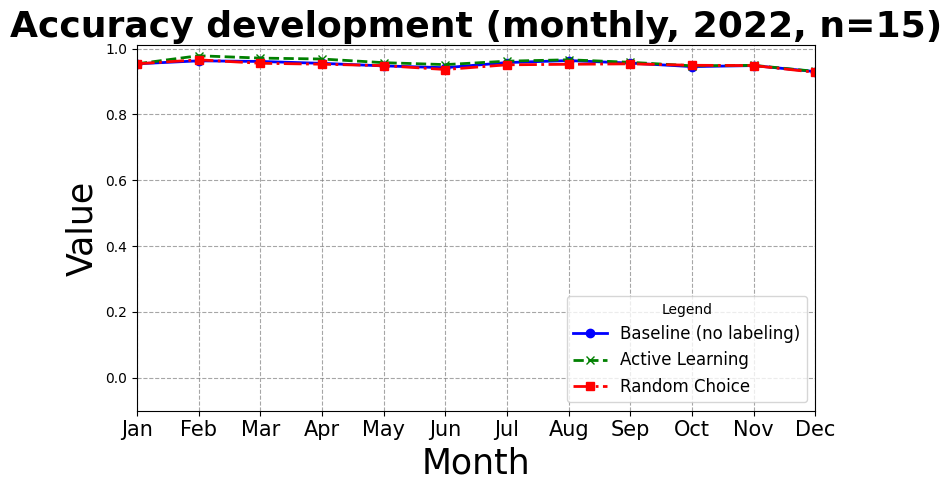

In [36]:
import matplotlib.pyplot as plt
import numpy as np


# Create the plot
plt.figure(figsize=(8, 5))  # Set figure size

# Plot the three lines with custom styles
plt.plot(b_acc, label='Baseline (no labeling)', color='blue', linewidth=2, linestyle='-', marker='o')
plt.plot(a_acc, label='Active Learning', color='green', linewidth=2, linestyle='--', marker='x')
plt.plot(r_acc, label='Random Choice', color='red', linewidth=2, linestyle='-.', marker='s')

# Add a title and labels
plt.title("Accuracy development (monthly, 2022, n={})".format(number), fontsize=26, fontweight='bold')
plt.xlabel("Month", fontsize=25)
plt.ylabel("Value", fontsize=25)

# Customize the grid and style
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Add a legend
plt.legend(title='Legend', loc='lower right', fontsize=12)

xtick_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Positions on the x-axis
xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(xtick_positions, xtick_labels, fontsize=15)  # Assign custom xticklabels

# Customize the x and y axis limits (optional)
plt.xlim([0, 11])
plt.ylim([-0.1, 1.01])

# Add a tight layout
plt.tight_layout()

# Display the plot
#plt.savefig("figures/accuracy_2022_{}.pdf".format(number), dpi=300, transparent=True)
plt.show()


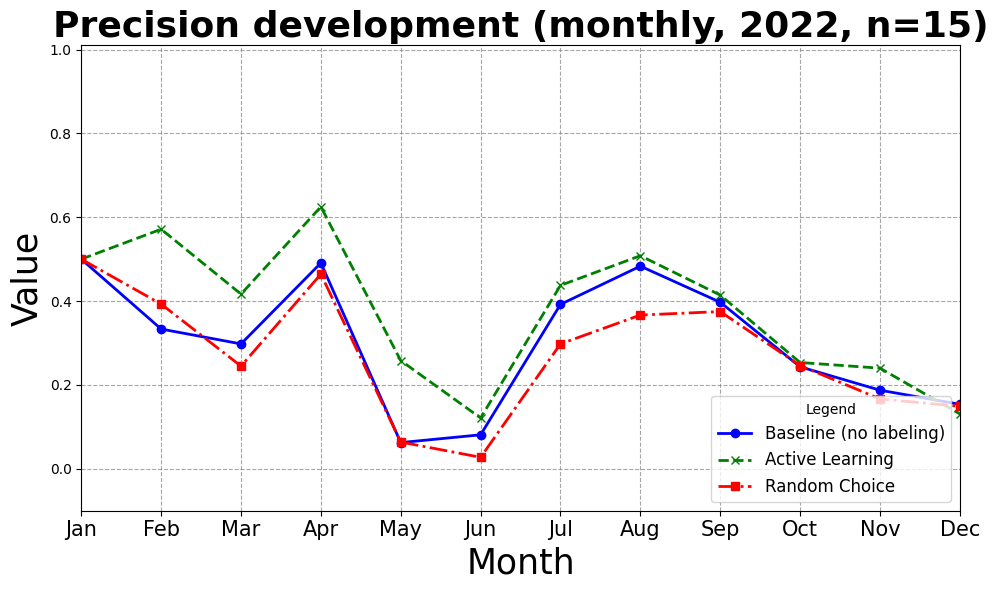

In [37]:
import matplotlib.pyplot as plt
import numpy as np




# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size

# Plot the three lines with custom styles
plt.plot(b_prec, label='Baseline (no labeling)', color='blue', linewidth=2, linestyle='-', marker='o')
plt.plot(a_prec, label='Active Learning', color='green', linewidth=2, linestyle='--', marker='x')
plt.plot(r_prec, label='Random Choice', color='red', linewidth=2, linestyle='-.', marker='s')

# Add a title and labels
plt.title("Precision development (monthly, 2022, n={})".format(number), fontsize=26, fontweight='bold')
plt.xlabel("Month", fontsize=25)
plt.ylabel("Value", fontsize=25)

# Customize the grid and style
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Add a legend
plt.legend(title='Legend', loc='lower right', fontsize=12)

xtick_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Positions on the x-axis
xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(xtick_positions, xtick_labels, fontsize=15)  # Assign custom xticklabels

# Customize the x and y axis limits (optional)
plt.xlim([0, 11])
plt.ylim([-0.1, 1.01])

# Add a tight layout
plt.tight_layout()

# Display the plot
#plt.savefig("figures/precision_2022_{}.pdf".format(number), dpi=300, transparent=True)
plt.show()

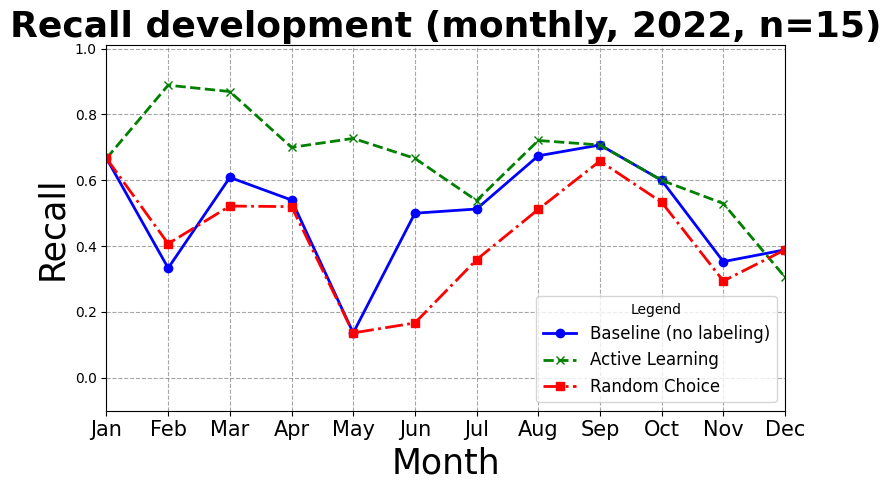

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data for three lines
x = np.linspace(0, 12, 1)  # Generate 100 points between 0 and 10
y1 = b_acc               # First line (sine wave)
y2 = a_acc               # Second line (cosine wave)
y3 = r_acc           # Third line (tangent wave scaled down)

# Create the plot
plt.figure(figsize=(8, 5))  # Set figure size

# Plot the three lines with custom styles
plt.plot(b_rec, label='Baseline (no labeling)', color='blue', linewidth=2, linestyle='-', marker='o')
plt.plot(a_rec, label='Active Learning', color='green', linewidth=2, linestyle='--', marker='x')
plt.plot(r_rec, label='Random Choice', color='red', linewidth=2, linestyle='-.', marker='s')

# Add a title and labels
plt.title("Recall development (monthly, 2022, n={})".format(number), fontsize=26, fontweight='bold')
plt.xlabel("Month", fontsize=25)
plt.ylabel("Recall", fontsize=25)

# Customize the grid and style
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Add a legend
plt.legend(title='Legend', loc='lower right', fontsize=12)

xtick_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Positions on the x-axis
xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(xtick_positions, xtick_labels, fontsize=15)  # Assign custom xticklabels

# Customize the x and y axis limits (optional)
plt.xlim([0, 11])
plt.ylim([-0.1, 1.01])

# Add a tight layout
plt.tight_layout()

# Display the plot
#plt.savefig("figures/recall_2022_{}.pdf".format(number), dpi=300, transparent=True)
plt.show()

In [39]:
imp_rec = []

for i in range(len(a_rec)):
    imp_rec.append(a_rec[i] / b_rec[i])


print(imp_rec)

[1.0, 2.6666666666666665, 1.4285714285714284, 1.296296296296296, 5.333333333333334, 1.3333333333333333, 1.05, 1.0689655172413792, 1.0, 1.0, 1.5, 0.7857142857142858]


In [40]:
b_miss = [len(df_2022_1) - int(b_acc[0]*len(df_2022_1)),
              len(df_2022_2) - int(b_acc[1]*len(df_2022_2)),
              len(df_2022_3) - int(b_acc[2]*len(df_2022_3)),
              len(df_2022_4) - int(b_acc[3]*len(df_2022_4)),
              len(df_2022_5) - int(b_acc[4]*len(df_2022_5)),
              len(df_2022_6) - int(b_acc[5]*len(df_2022_6)),
              len(df_2022_7) - int(b_acc[6]*len(df_2022_7)),
              len(df_2022_8) - int(b_acc[7]*len(df_2022_8)),
              len(df_2022_9) - int(b_acc[8]*len(df_2022_9)),
              len(df_2022_10) - int(b_acc[9]*len(df_2022_10)),
              len(df_2022_11) - int(b_acc[10]*len(df_2022_11)),
              len(df_2022_12) - int(b_acc[11]*len(df_2022_12))]


a_miss = [len(df_2022_1) - int(a_acc[0]*len(df_2022_1)),
              len(df_2022_2) - int(a_acc[1]*len(df_2022_2)),
              len(df_2022_3) - int(a_acc[2]*len(df_2022_3)),
              len(df_2022_4) - int(a_acc[3]*len(df_2022_4)),
              len(df_2022_5) - int(a_acc[4]*len(df_2022_5)),
              len(df_2022_6) - int(a_acc[5]*len(df_2022_6)),
              len(df_2022_7) - int(a_acc[6]*len(df_2022_7)),
              len(df_2022_8) - int(a_acc[7]*len(df_2022_8)),
              len(df_2022_9) - int(a_acc[8]*len(df_2022_9)),
              len(df_2022_10) - int(a_acc[9]*len(df_2022_10)),
              len(df_2022_11) - int(a_acc[10]*len(df_2022_11)),
              len(df_2022_12) - int(a_acc[11]*len(df_2022_12))]

r_miss = [len(df_2022_1) - int(r_acc[0]*len(df_2022_1)),
              len(df_2022_2) - int(r_acc[1]*len(df_2022_2)),
              len(df_2022_3) - int(r_acc[2]*len(df_2022_3)),
              len(df_2022_4) - int(r_acc[3]*len(df_2022_4)),
              len(df_2022_5) - int(r_acc[4]*len(df_2022_5)),
              len(df_2022_6) - int(r_acc[5]*len(df_2022_6)),
              len(df_2022_7) - int(r_acc[6]*len(df_2022_7)),
              len(df_2022_8) - int(r_acc[7]*len(df_2022_8)),
              len(df_2022_9) - int(r_acc[8]*len(df_2022_9)),
              len(df_2022_10) - int(r_acc[9]*len(df_2022_10)),
              len(df_2022_11) - int(r_acc[10]*len(df_2022_11)),
              len(df_2022_12) - int(r_acc[11]*len(df_2022_12))]


In [41]:
def cumulative_sum(input_list):
    result_list = []  # Initialize an empty list to store the result
    cumulative_sum = 0  # Variable to keep track of the cumulative sum

    # Iterate over the input list
    for i in range(len(input_list)):
        cumulative_sum += input_list[i]  # Add the current value to the cumulative sum
        result_list.append(cumulative_sum)  # Append the cumulative sum to the result list

    return result_list

a_miss_tot = cumulative_sum(a_miss)
b_miss_tot = cumulative_sum(b_miss)
r_miss_tot = cumulative_sum(r_miss)


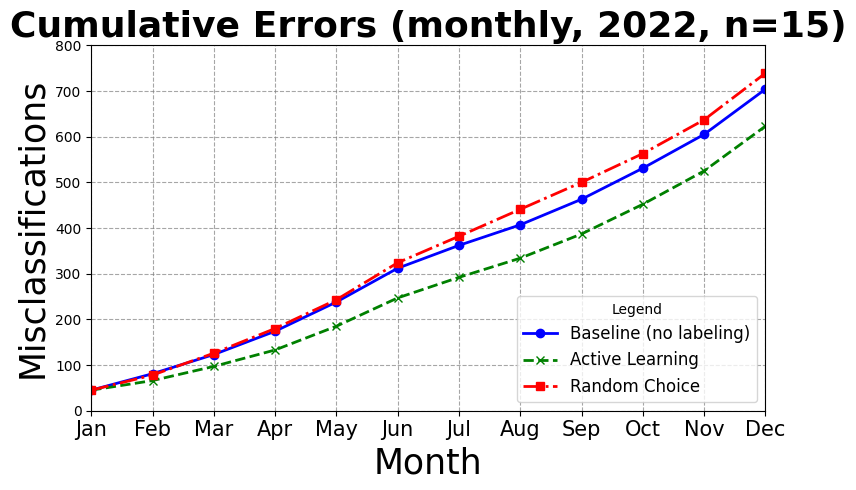

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Data for three lines
x = np.linspace(0, 12, 1)  # Generate 100 points between 0 and 10
y1 = b_acc               # First line (sine wave)
y2 = a_acc               # Second line (cosine wave)
y3 = r_acc           # Third line (tangent wave scaled down)

# Create the plot
plt.figure(figsize=(8, 5))  # Set figure size

# Plot the three lines with custom styles
plt.plot(b_miss_tot, label='Baseline (no labeling)', color='blue', linewidth=2, linestyle='-', marker='o')
plt.plot(a_miss_tot, label='Active Learning', color='green', linewidth=2, linestyle='--', marker='x')
plt.plot(r_miss_tot, label='Random Choice', color='red', linewidth=2, linestyle='-.', marker='s')

# Add a title and labels
plt.title("Cumulative Errors (monthly, 2022, n={})".format(number), fontsize=26, fontweight='bold')
plt.xlabel("Month", fontsize=25)
plt.ylabel("Misclassifications", fontsize=25)

# Customize the grid and style
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Add a legend
plt.legend(title='Legend', loc='lower right', fontsize=12)

xtick_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Positions on the x-axis
xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(xtick_positions, xtick_labels, fontsize=15)  # Assign custom xticklabels

# Customize the x and y axis limits (optional)
plt.xlim([0, 11])
plt.ylim([0, 800])

# Add a tight layout
plt.tight_layout()

# Display the plot
#plt.savefig("figures/errors_2022_{}.pdf".format(number), dpi=300, transparent=True)
plt.show()